In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/malaria-parasite-in-blood-smears/malaria_image_dataset/no_malaria/190813133916.png
/kaggle/input/malaria-parasite-in-blood-smears/malaria_image_dataset/no_malaria/190813132547.png
/kaggle/input/malaria-parasite-in-blood-smears/malaria_image_dataset/no_malaria/190813134045.png
/kaggle/input/malaria-parasite-in-blood-smears/malaria_image_dataset/no_malaria/190813132746.png
/kaggle/input/malaria-parasite-in-blood-smears/malaria_image_dataset/no_malaria/190813132530.png
/kaggle/input/malaria-parasite-in-blood-smears/malaria_image_dataset/no_malaria/190813134241.png
/kaggle/input/malaria-parasite-in-blood-smears/malaria_image_dataset/no_malaria/190813132803.png
/kaggle/input/malaria-parasite-in-blood-smears/malaria_image_dataset/no_malaria/190813133454.png
/kaggle/input/malaria-parasite-in-blood-smears/malaria_image_dataset/no_malaria/190813132944.png
/kaggle/input/malaria-parasite-in-blood-smears/malaria_image_dataset/no_malaria/190813133950.png
/kaggle/input/malaria-parasite

# CNN feature extractor + XGBClassifier

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xgboost as xgb
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [4]:
# Define the folders containing the image data
train_folder = "/kaggle/input/malaria-parasite-in-blood-smears/malaria_image_dataset/"
malaria_folder = train_folder + "malaria/"
no_malaria_folder = train_folder + "no_malaria/"

In [5]:
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
import os
# Load the image paths and labels
image_paths = []
labels = []

# Load images from the malaria folder
malaria_files = os.listdir(malaria_folder)
for file in malaria_files:
    if file.endswith(".png"):
        image_paths.append(os.path.join(malaria_folder, file))
        labels.append(1)  # Assign label 1 for malaria images

# Load images from the no malaria folder
no_malaria_files = os.listdir(no_malaria_folder)
for file in no_malaria_files:
    if file.endswith(".png"):
        image_paths.append(os.path.join(no_malaria_folder, file))
        labels.append(0)  # Assign label 0 for no malaria images

In [7]:
# Resize and preprocess input images for VGG16
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = preprocess_input(img)
    return img

# Extract features from images using VGG16
def extract_features(image_paths):
    features = []
    for path in image_paths:
        img = preprocess_image(path)
        img = np.expand_dims(img, axis=0)
        feature = base_model.predict(img)
        features.append(feature.flatten())
    return np.array(features)

In [8]:
# Extract features from images
features = extract_features(image_paths)

1/1 [==============================] - 0s 18ms/step


In [9]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [21]:
import xgboost as xgb

# Inisialisasi XGBoost Classifier
xgb_model = xgb.XGBClassifier()

# Melakukan fitting dengan data training
xgb_model.fit(X_train, y_train)

accuracy = xgb_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8


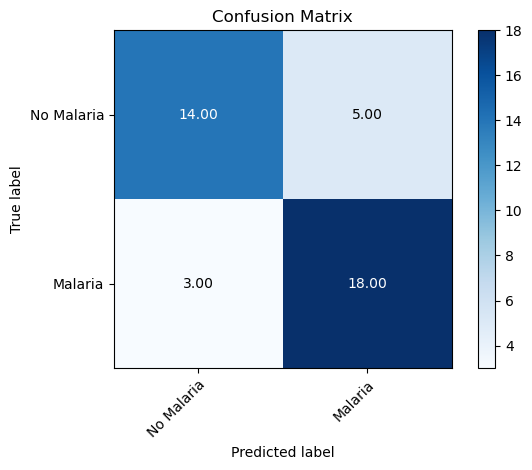

In [22]:
from sklearn.metrics import confusion_matrix
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
classes = ['No Malaria', 'Malaria']
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       title='Confusion Matrix')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

plt.show()

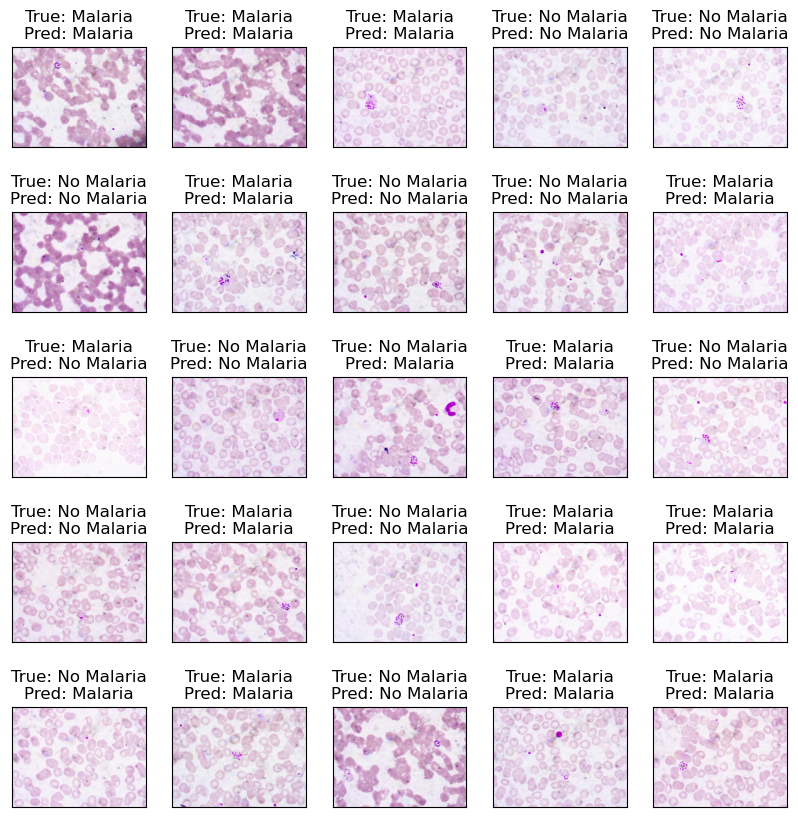

In [12]:
from PIL import Image
# Make predictions on the test set
predictions = xgb_model.predict(X_test)

# Define class names
class_names = ['No Malaria', 'Malaria']

# Plot the images with actual and predicted labels
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)

for i, ax in enumerate(axes.flat):
    # Display the image
    ax.imshow(Image.open(image_paths[i]))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)

    # Get the true and predicted labels
    true_label = class_names[y_test[i]]
    pred_label = class_names[predictions[i]]

    # Set the title with the true and predicted labels
    ax.set_title(f'True: {true_label}\nPred: {pred_label}')

plt.show()


In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[14  5]
 [ 3 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        19
           1       0.78      0.86      0.82        21

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40


Accuracy: 0.8


1/1 [==============================] - 0s 171ms/step


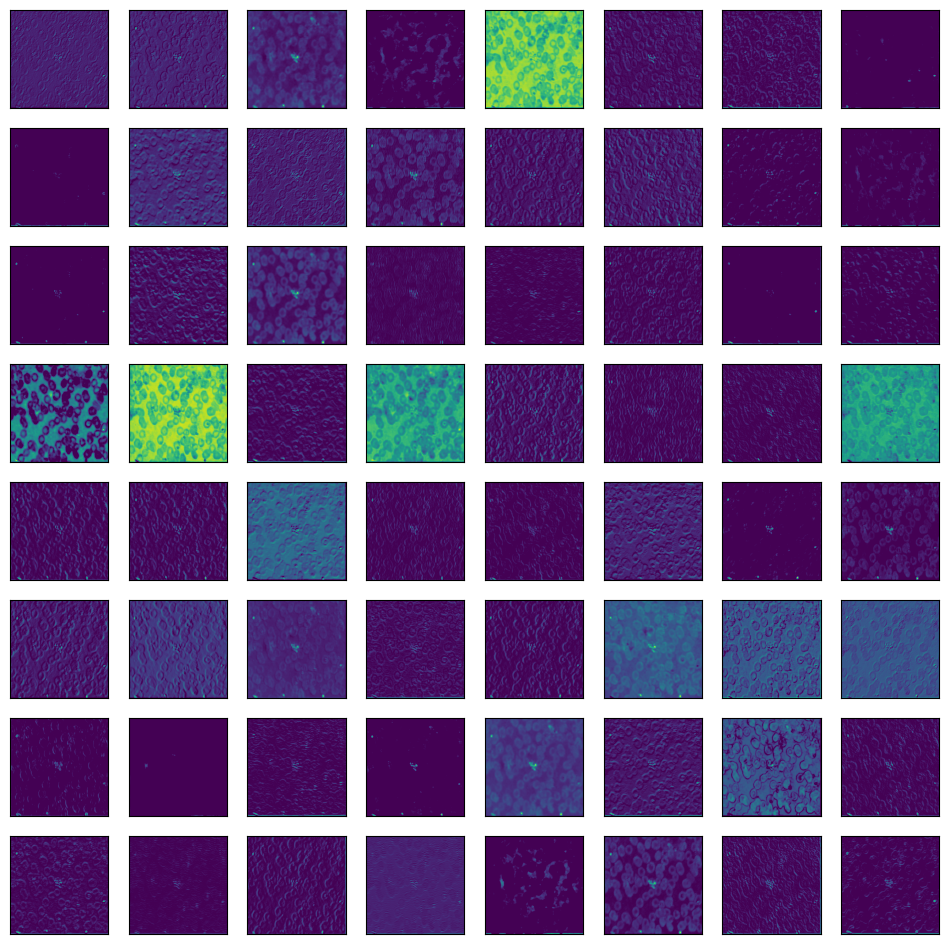

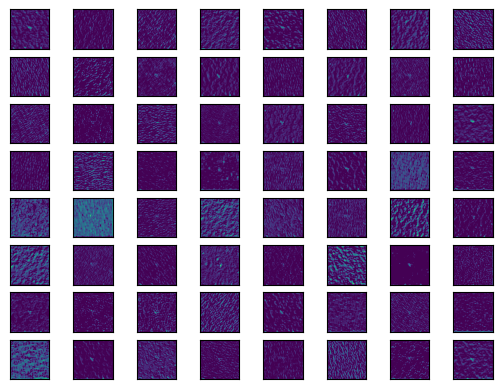

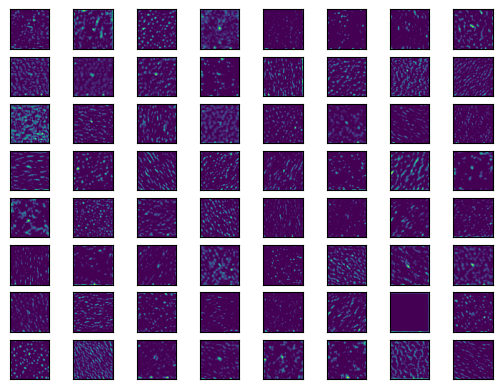

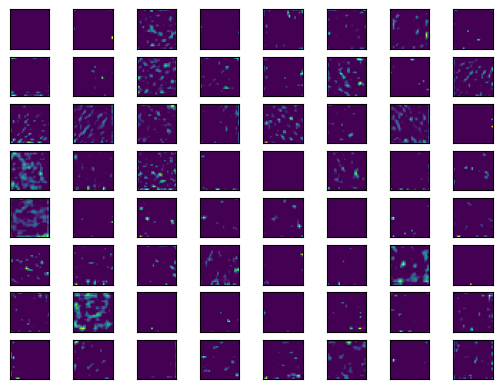

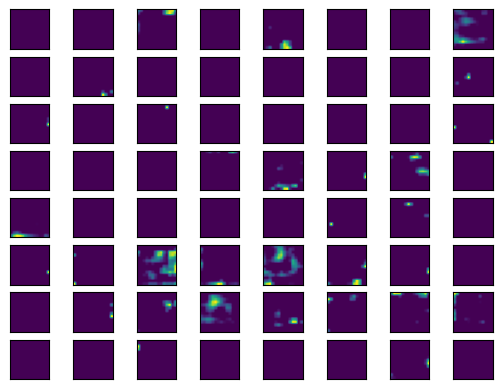

In [50]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from PIL import Image
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

# Load the VGG16 model
model = VGG16(weights='imagenet', include_top=False, pooling='avg')

# Redefine the model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

# Load the image with the required shape
img_path = '/kaggle/input/malaria-parasite-in-blood-smears/malaria_image_dataset/malaria/190813124322.png'
img = Image.open(img_path)
img = img.resize((224, 224))

# Convert the image to an array
img = expand_dims(img, axis=0)

# Prepare the image (e.g., scale pixel values for VGG)
img = preprocess_input(img)

# Get feature maps for each block
feature_maps = model.predict(img)

# Plot the output from each block
square = 8
fig = pyplot.figure(figsize=(12, 12))  # Adjust the figure size here
for fmap in feature_maps:
    # Plot all 64 maps in an 8x8 grid
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # Specify subplot and turn off axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            
            # Plot filter channel in color
            pyplot.imshow(fmap[0, :, :, ix-1])
            ix += 1
    
    # Show the figure
    pyplot.show()


In [60]:
output_path = '/kaggle/working/block_3_feature_maps.png'
fig.savefig(output_path, bbox_inches='tight', pad_inches=0)



In [61]:
from PIL import Image

image_path = '/kaggle/working/block_3_feature_maps.png'
image = Image.open(image_path)

# Display the loaded image
image.show()


/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/tmp/tmphdgsn_8p.PNG'
